## Counting equilateral triangles within a trapezium using symmetric sequences
This Julia notebook can be used to explore the symbolic formulae for calculating the number of equilateral triangles within a trapezium as described in the articles:

* [Counting equilateral triangles within a trapezium: a connection to the symmetric arithmetic triangle](http://dx.doi.org/10.13140/RG.2.2.11328.76800)

* [Counting equilateral triangles within a trapezium using symmetric sequences](http://dx.doi.org/10.13140/RG.2.2.17113.65129/1)


SymPy is used to obtain formulae for the upward and downward triangle sums
directly from their symbolic summation representations; which is a very remarkable feature of SymPy!

This notebook uses the Luxor package to produce svg (or png) diagrams of trapeziums with the upward and downward triangle numbers drawn within each triangular cell as shown below. This can be achieved with the command ```drawtrapezium(base = 7, height = 4)```



Towards the end of this notebook the trapezium triangle sum function is visualised in some 3D plots.

## Julia dependencies

To make this notebook run you will need to install [Julia](https://julialang.org/) which is very easy to do.
If you discover that you have missing packages in your Julia installation you can add them using the following commands at the Julia prompt:

``` 
julia> import Pkg
julia> Pkg.add("SymPy")
julia> Pkg.add("Printf")
julia> Pkg.add("Luxor")
julia> Pkg.add("Plots")
julia> Pkg.add("PyPlot")
julia> Pkg.add("BenchmarkTools")
julia> Pkg.add("PyPlot")
julia> Pkg.add("LaTeXStrings")
julia> Pkg.add("FFMPEG")
julia> Pkg.update()
``` 

In [1]:
#Math229 https://mth229.github.io/symbolic.html
using SymPy
using Printf
import_from(sympy)
using Luxor
using Plots
using PyPlot
using BenchmarkTools
using LaTeXStrings
using FFMPEG

In [2]:
b, h, i,  n, r = symbols("b h i n r",  integer=true, positive=true);

## The upward triangle sum $\sum\bigtriangleup_n$


In the figure below the value shown in each triangular cell equals the total number of triangles whose apex is in common with that numbered cell. Thus, all the triangular cells with a 1 inside them will not share their apex with any other larger triangle. Cells with a 2 inside them will share their apex with triangles of base sizes 1 and 2 only. Triangular cells with a 3 inside them will share their apex with triangles of a maximum base size of 3, etc. 
 
 
The upward triangle values form a horizontal layered pattern with a constant cell value across each row. Ascending the trapezium by one row results in each cell value increasing by one, but the frequency of terms in each layer will decrease by one. The upward triangle sum formula can therefore be summarised as follows.




\begin{align*}\sum\limits_{n=1}^{n=h}\bigtriangleup_n  &= b\times1+ (b-1)\times2+(b-2)\times3+(b-3)\times4 +\ldots+(b-h+1)\times h \\
&= \sum_{i=1}^{i=h}\left(b+1-i\right)i \\
&= \frac{h \left(h + 1\right) \left(3 b - 2 h + 2\right)}{6}
\end{align*}

#### Using SymPy to evaluate the upward triangle summation

In SymPy we can express the upward triangle summation by using the symbols $b$, $h$ and $i$:

In [3]:
sympy.Sum((b+1-i)*i, (i, 1, h)) 

  h                
 ___               
 ╲                 
  ╲                
  ╱   i⋅(b - i + 1)
 ╱                 
 ‾‾‾               
i = 1              

SymPy can then be used to evaluate the above sum using the **.doit()** method and the result can then be written as a symbolic function.

In [4]:
UpwardTriangleSum(b,h) = sympy.factor(sympy.Sum((b+1-i)*i, (i, 1, h)).doit())
UpwardTriangleSum(b,h)

h⋅(h + 1)⋅(3⋅b - 2⋅h + 2)
─────────────────────────
            6            

## The downward triangle sum $\sum\bigtriangledown_n$ 

The downward triangle sum is more challenging and two distinct cases present themselves. Case one is when the top edge, $b-h$, of the $(b,h)$-trapezium is greater than or equal to the slant height $h$. The second case is when $ b -h< h$. For the former case we have the inequality:
$$
\begin{align}
\mathrm{top\ edge} & \geq \mathrm{slant\ height}\\
b - h &\geq h \\
b &\geq 2h
\end{align}
$$

### Downward triangle sum: case $b \geq 2h$


In the figure below the red number in each downward facing triangular cell denotes the number of downward facing triangles whose lowest vertex is in common with the **lowest** vertex of that particular numbered cell. Therefore, cells with a 1 inside them will not share their lowest vertex with any other downward triangle. Cells with a 2 inside them will have their lowest vertex in common with two downward triangles: one with base size 1 and the other with base size 2, etc.

For the case $b \geq 2h$, cells with the same integer value form concentric bridge shaped arcs, as shown in figure below. This concentric arc pattern always exists because the top edge of the $(b, h)$-trapezium is sufficiently long enough to form downward triangles with a maximum base size equal to the slant height $h$.




Each concentric integer arc is, in general, formed by three parts: two of which are slanted and the third which is horizontal. Thus, from the above figure we can form the required sum from the two yellow side sequences and the central sequence shown in green.

\begin{align*}
\sum\limits_{n=1, b \geq 2h}^{n=h}\bigtriangledown_n &= 2\left(1\times h + 2\times (h-1)+3\times (h-2)+\ldots+h\times1 \right) + \\
&     \hspace{1.5cm}1\times(b-h-2)+ 2\times(b-h-3)+\ldots+h\times(b-2h-1)\\
&= 2 \sum_{i=1}^{h} i \left(h - i + 1\right) + \sum_{i=1}^{h} i \left(b - h - i - 1\right) \\ 
&= \frac{1}{2} h \left(b - h\right) \left(h + 1\right)
\end{align*}


#### Using SymPy to evaluate the downward triangle summation: case $b \geq 2h$

In the cell below, the downward triangle sum is expressed and thereafter the sum is evaluted using the **.doit()** function and factorised.

In [5]:
 2*sympy.Sum((h+1-i)*i, (i, 1, h))+sympy.Sum(i*(b-h-1-i), (i, 1, h))

    h                     h                    
   ___                   ___                   
   ╲                     ╲                     
    ╲                     ╲                    
2⋅  ╱   i⋅(h - i + 1) +   ╱   i⋅(b - h - i - 1)
   ╱                     ╱                     
   ‾‾‾                   ‾‾‾                   
  i = 1                 i = 1                  

In [6]:
DownwardTriangleSum_b_geq_2h(b,h) = factor(2*sympy.Sum((h+1-i)*i, (i, 1, h)).doit()+sympy.Sum(i*(b-h-1-i), (i, 1, h)).doit())
DownwardTriangleSum_b_geq_2h(b,h)

h⋅(b - h)⋅(h + 1)
─────────────────
        2        

### Downward triangle sum: case $b \lt 2h$


If the top edge, $b-h$, of the trapezium is shorter than the slant height, $h$, then there is a change in the cell number pattern. This is because **none** of the downward facing triangles that have their bases along the top edge of the trapezium will reach down as far as the base of the trapezium, as shown in the figure below. Subsequently, along the bottom row(s) of the trapezium the number pattern of the SA-triangle emerges (the SA-triangle is introduced in the original [article](http://dx.doi.org/10.13140/RG.2.2.11328.76800)).


The sum of all downward triangles in the SA-triangle from row 1 (which is the top row) down to row $r$ is denoted by $SAT(r)$ and is given by the following formula:

\begin{equation*}
SAT(r) = \frac{\left(-1\right)^{r + 1}}{16} + \frac{r \left(r + 2\right) \left(2 r + 5\right)}{24} + \frac{1}{16}
\end{equation*}





Three subseries form the total downward triangle sum, these can be seen in figure above and are described as follows:

1. The sum within the bottom row(s) of the trapezium i.e. the grey coloured cells.
2. The sum of downward triangles with their bases along the top edge of the trapezium i.e. the cells values grouped within the central red downward triangle.
3. The sum within the two blue side portions.

Sum 1.  is equal to the difference between two $SAT(r)$ values (i.e. the sum from the bottom row of the trapezium to the row just below the largest downward reaching triangle from the top edge of the trapezium):

$$SAT(b-1)-SAT(b-1-(2h-b))$$ 

Sum 2. is formed by the cells grouped within the red downward triangle which can be expressed as follows:
\begin{gather*}
 1 \times (b-h)+ 2 \times (b-h-1) + 3 \times (b-h-2) +\ldots + (b-h) \times 1 \\
 =\sum_{i=1}^{b - h} i \left(b - h - i + 1\right)
\end{gather*}

Finally, sum 3. which is formed by the two side sequences shown in the blue cells can be expressed as:
\begin{gather*}
 2\big( 1\times (b-h-1) + 2\times (b-h-2) + 3\times (b-h-3) + \ldots + (b-h-1) \times 1 \big) \\
=2 \sum_{i=1}^{b - h - 1} i \left(b - h - i\right)
\end{gather*}

Hence, the downward triangle sum for the case $b < 2h$ is given by:
\begin{align*}\sum\limits_{n=1, b < 2h}^{n=h}\bigtriangledown_n 
& = SAT(b-1)-SAT(2b-2h-1)+\sum_{i=1}^{b - h} i \left(b - h - i + 1\right)+\sum_{i=1}^{b - h - 1} i \left(b - h - i\right) \\
& = SAT(b-1)-SAT(2b-2h-1)  + \frac{1}{6}\left(b-h\right)^2\left(b-h+1\right) \\
&=\frac{\left(-1\right)^{b}}{16} - \frac{b^{3}}{12} + \frac{b^{2} h}{2} + \frac{b^{2}}{8} - \frac{b h^{2}}{2} + \frac{b}{12} + \frac{h^{3}}{6} - \frac{h}{6} - \frac{1}{16}
\end{align*}

#### Using SymPy to evaluate the downward triangle summation: case $b \lt 2h$

First the symbolic function $SAT(r)$ is defined.

In [7]:
SAT(r) = sympy.factor(r*(r+2)*(2*r+5)/24+(1+(-1)^(r+1))/16)
SAT(r)

        r      3       2           
- 3⋅(-1)  + 4⋅r  + 18⋅r  + 20⋅r + 3
───────────────────────────────────
                 48                

Now an expression for the downward triangle sum can be written.

In [8]:
SAT(b-1)-SAT(2*b-2*h-1)+sympy.Sum(i*(b-h+1-i), (i, 1, b-h))+2*sympy.Sum(i*(b-h-i), (i, 1, b-h-1))

                                                                            b 
                                                                              
                                              b      3      2                 
  (b - h)⋅(b - h + 1)⋅(4⋅b - 4⋅h - 1)   3⋅(-1)  + 4⋅b  + 6⋅b  - 4⋅b - 3       
- ─────────────────────────────────── + ─────────────────────────────── + 2⋅  
                   6                                   48                     
                                                                              
                                                                              

- h - 1                 b - h                  
 ___                     ___                   
 ╲                       ╲                     
  ╲                       ╲                    
  ╱     i⋅(b - h - i) +   ╱   i⋅(b - h - i + 1)
 ╱                       ╱                     
 ‾‾‾                     ‾‾‾                   
i = 1                   i = 1  

The downward triangle sum is now evaluated and simplified.

In [9]:
DownwardTriangleSumExpression = SAT(b-1)-SAT(2*b-2*h-1)+sympy.factor(sympy.Sum(i*(b-h+1-i), (i, 1, b-h)).doit()+2*sympy.Sum(i*(b-h-i), (i, 1, b-h-1)).doit())

       2                                                           b      3   
(b - h) ⋅(b - h + 1)   (b - h)⋅(b - h + 1)⋅(4⋅b - 4⋅h - 1)   3⋅(-1)  + 4⋅b  + 
──────────────────── - ─────────────────────────────────── + ─────────────────
         2                              6                                   48

   2          
6⋅b  - 4⋅b - 3
──────────────
              

We can now expand the above expression and turn the result into a symbolic function (not the same as a Julia function based on Int or Float data types). The resulting formula for the downward triangle sum can now be conveniently compared to the result obtained in the original [article](http://dx.doi.org/10.13140/RG.2.2.11328.76800)

In [10]:
DownwardTriangleSum_b_lt_2h(b,h)= SymPy.simplify(SAT(b-1)-SAT(2*b-2*h-1)+sympy.Sum(i*(b-h+1-i), (i, 1, b-h)).doit()+2*sympy.Sum(i*(b-h-i), (i, 1, b-h-1)).doit())
DownwardTriangleSum_b_lt_2h(b,h)

    b    3    2      2      2         3         
(-1)    b    b ⋅h   b    b⋅h    b    h    h   1 
───── - ── + ──── + ── - ──── + ── + ── - ─ - ──
  16    12    2     8     2     12   6    6   16

In [11]:
Downward_Triangle_Sum_FirstArticleFormula=expand((b^2-1)*(2*b+3)/24+(1+(-1)^b)/16-(b-h-1)*(b-h)*(b-h+1)/6)

    b    3    2      2      2         3         
(-1)    b    b ⋅h   b    b⋅h    b    h    h   1 
───── - ── + ──── + ── - ──── + ── + ── - ─ - ──
  16    12    2     8     2     12   6    6   16

Now we can check to see if the formula from the first article, ```Downward_Triangle_Sum_FirstArticleFormula```, matches the formula, ```DownwardTriangleSum_b_lt_2h(b,h)```, obtained by SymPy.

In [12]:
Downward_Triangle_Sum_FirstArticleFormula==DownwardTriangleSum_b_lt_2h(b,h)

true

# Drawing labelled trapeziums

The following code is helpful for drawing diagrams to investigate the *counting triangles within a trapezium* problem. 
The Luxor package is used to generate trapezium diagrams and label the upward and downward triangle quantities within each cell. 
The ```drawtrapezium(base, height)``` function (see below) draws a trapezium and for this particular trapezium, the SymPy derived formulae for the upward and downward sums are compared to the numerical results obtained by a brute force counting algorithm.

In [13]:
"""

This function takes integer inputs for the base and height and then produces the svg file TrapeziumTriangles.svg 
containing the image, with minor editing a of the code a png file can be produced if desired.
The upward and downward and downward triangle sum formulae for the drawn trapezium are also cross checked with brute-force counting.

base::Int    base length of the trapezium to be drawn
height::Int  height of the trapezium

usage example: 
drawtrapezium(base = 8, height = 5)

"""
function drawtrapezium( ; base::Int = 8, height::Int = 3)
    
    if (height > base || height < 1 || base < 1 )
        @printf("\nPlease check that your base (%i) and height (%i) values are correct",base, height)
        return
    end
    
    uptrianglesum::UInt128 = 0
    downtrianglesum::UInt128 =0
    radius::UInt128 = 30
   
    t_height = radius*1.5
    t_width = sqrt(3)*radius
    Drawing(floor((base+1)*t_width), floor((height+1)*t_height),"TrapeziumTriangles.svg")
    P = Point(t_width/2,t_height/2)
    setcolor("black")
    fontface("Helvetica")
    fontsize(17)

    for j = 1:height
        for i = 1:(base-j+1)
            x_pos= P.x+t_width/2+(j-1)*t_width/2+t_width*(i-1)
            y_pos= (height+1-j)*t_height+radius/2
            ngon(x_pos, y_pos, radius, 3, 3pi/2, :stroke)
            setcolor("blue")
            Luxor.text(string(j),Point(x_pos,y_pos),halign=:center,valign=:middle)
            uptrianglesum += j
            setcolor("black")
            if(i < base-j+1)
                x_pos= P.x+(j-1)*t_width/2 +t_width*i
                y_pos= (height+1-j)*t_height
                ngon(x_pos, y_pos, radius, 3, pi/2, :stroke)
                setcolor("red")
                Luxor.text(string(min(height+1-j,abs(base+1-j-i),i)),Point(x_pos,y_pos),halign=:center,valign=:middle)
                downtrianglesum += min(height+1-j,abs(base+1-j-i),i)
                setcolor("black")
            end
        end
    end 

    
print("Uptriangle sum from diagram= ", uptrianglesum, "  Downtriangle sum from diagram= ",downtrianglesum)
UTS= UpwardTriangleSum(base,height)
print("\nUptriangle sum from formula= ", UTS)
    
    if (base >= 2*height)
        DTS = DownwardTriangleSum_b_geq_2h(base,height)
    else
        DTS = DownwardTriangleSum_b_lt_2h(base,height)
    end
    @printf("  Downtriangle sum from formula= %.0f ", DTS)
    if (abs(DTS-downtrianglesum)<0.001 && abs(UTS-uptrianglesum)<0.001)
        print("\nTotal triangle sum= ",uptrianglesum+downtrianglesum)
        print("\n\nFormulae check passed")

    end
    
finish()
Luxor.preview()
end

drawtrapezium

Uptriangle sum from diagram= 80  Downtriangle sum from diagram= 46
Uptriangle sum from formula= 80  Downtriangle sum from formula= 46 
Total triangle sum= 126

Formulae check passed

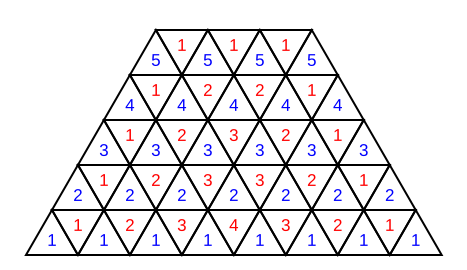

In [14]:
drawtrapezium(base = 8, height = 5)


# Checking the upward and downward triangle sum formulae 


In [15]:
"""

The checkformula function checks the symbolic formulae sums against the sums calculated using brute-force counting.
All the trapeziums are checked from a specified minimum base to maximum base size, and from a minimum height to a maxium 
height.

base_min::Int64 the minimum base length
base_max::Int64  the maximum base 
height_min::Int64 the minimum height 
height_max::Int64 the maxium height
printoutput:: boole, toggles whether each trapezium calculation is shown. 

If the formula miscalculates on any instance of base and height then output will be produced.
For protection some limits have been placed on the number of total calculations because SymPy functions are 
not as fast as functions written with Julia's default data types

usage examples:

checkformula(15,20,14,19,false);
checkformula(1,20,1,19,true)

"""
function checkformula(; base_min::Int64=1, base_max::Int64=10, height_min::Int64=1, height_max::Int64=10, printoutput::Bool=true)
    
    if (height_min > height_max || base_min > base_max || height_min < 1 || base_min < 1 || height_max > base_max || height_min > base_min)
        print("\nPlease check that your base and height limits are correct (base needs to exceed height)")
        return(-1)
    elseif( (height_max-height_min)*(base_max-base_min)>4000)
         print("\nYou have requested a lot of SymPy calculations,
            \n the runtime would be very slow because SymPy does not use Julia type data variables. 
            \n This calculation has been aborted, please use (height_max-height_min)*(base_max-base_min)<4000 ")
        return(-2)
    end
    
    uptrianglesum::UInt128 = 0
    downtrianglesum::UInt128 = 0
    UTS::UInt128 = 0
    DTS::UInt128 = 0
    for height = height_min:height_max
        for base =base_min:base_max
            if (height > base)
                continue 
            end
            uptrianglesum = 0
            downtrianglesum = 0
            for j = 1:height
                for i = 1:(base-j+1)
                    uptrianglesum += j
                    if(i < base-j+1) #Check if another downward triangle needs to be drawn
                        downtrianglesum += min(height+1-j,abs(base+1-j-i),i)
                    end
                end
            end
            if (base >= 2*height)
                DTS = DownwardTriangleSum_b_geq_2h(base,height)
            else
                DTS = DownwardTriangleSum_b_lt_2h(base,height)
            end
            UTS= UpwardTriangleSum(base,height)
            if(printoutput)
                @printf("\n(%i,%i)-trapezium \n Formula UpSum= %i DownSum= %i,  Total=%i",base,height,uptrianglesum,downtrianglesum, uptrianglesum+downtrianglesum)
                @printf("\n Diagram UpSum= %i DownSum= %.0f",UTS,DTS)
            end
            if (abs(DTS-downtrianglesum)<0.001 && abs(UTS-uptrianglesum)<0.001)
                if(printoutput)
                    print(" .. OK check passed")
                end
            else
                print("\nFormula FAILED aborting further checks")
                return(-2)
            end
  
        end
    end
    print("\nOk all checks passed")
    return(1);
end

checkformula

In [16]:
checkformula(base_min= 15, base_max= 20, height_min= 14, height_max= 19, printoutput= false);


Ok all checks passed

# Julia functions for calculating upward and downward triangle sums

The functions below are very useful for producing arrays for plotting. It is useful to use Julia variables  instead of SymPy variables/functions because Julia variables are much faster to compute with. Whilst the ***lambidify*** function can be used to change SymPy expressions into Julia functions, this is avoided here.
In the code block below the following intuitively named functions are defined. 

`DTS_julia(base::Int64, height::Int64)` (downward triangle sum calculator)

`UTS_julia(base::Int64, height::Int64)` (upward triangle sum calculator)

`total_triangle_sum(base::Int64, height::Int64)` 

`make_base_height_sum_arrays(base_min, base_max, height_min, height_max)` 

In [17]:
"""

Downward Triangle Sum
This function uses julia variables to calculate the result for the downward triangle sum
and so will be much faster than using the SymPy versions of the formulae. 

b::Int64 trapezium base length
h::Int64 trapezium height 

usage example:

`DTS_julia(5,3)`

"""
function DTS_julia(b::Int64 = 5, h::Int64 = 2)

    if (b >= 2*h && h > 0 && h <= b )
        return(h*(b - h)*(h + 1)/2)
    elseif (b < 2*h && b > 0 && h <= b)
        return((b^2-1)*(2*b+3)/24+(1+(-1)^b)/16-(b-h-1)*(b-h)*(b-h+1)/6)
    else
        return(0)
    end
end


"""

Upward Triangle Sum
This function uses julia variables to calculate the result for the upward triangle sum 
and so will be much faster than using the SymPy versions of the formulae. 

b::Int64 trapezium base length
h::Int64 trapezium height 

usage example:

`UTS_julia(5,3)`

"""
function UTS_julia(b::Int64=5, h::Int64=2)
    if(b > 0 && h <= b)
        return(h*(h + 1)*(3*b - 2*h + 2)/6)
    else
        return(0)
    end
end

"""

This function uses julia variables to calculate the total triangle sum (upward + downward triangles) 
and so will be much faster than using the SymPy versions of the formulae. 

b::Int64 trapezium base length
h::Int64 trapezium height 

usage example:

`total_triangle_sum(5,3)`

"""
function total_triangle_sum(base::Int64=5, height::Int64=2)
    return(DTS_julia(base,height) + UTS_julia(base,height))
end

"""

This function generates three arrays
bases, heights and tsums

base[i] stores the base of the i'th trapezium

height[i] stores the height of the i'th trapezium

tsum[i] stores the total triangle sum (upward + downward triangles)

usage example:

`x,y,z = make_base_height_sum_arrays(base_min=1, base_max=100, height_min=1, height_max=100);`

"""
function make_base_height_sum_arrays(base_min::Int64=1, base_max::Int64=100, height_min::Int64=1, height_max::Int64=100)
    
    if (height_min > height_max || base_min > base_max || height_min < 1 || base_min < 1 || height_max > base_max || height_min > base_min)
        print("\nPlease check that your base and height limits are correct (base needs to exceed height)")
        return(-1, -1,-1)
    end
    
    bases=[0]
    heights=[0]
    tsums=[0]
    
    for height = height_min:height_max
        for base =base_min:base_max
            if (height > base)
                continue 
            end
            push!(bases,copy(base))
            push!(heights,copy(height))
            push!(tsums,(UTS_julia(base,height) + DTS_julia(base,height)))
        end
    end
    
    return(bases, heights, tsums)
end
            

make_base_height_sum_arrays

# Plotting 3D scatter graphs, contours, wiregraphs and animations

Here are a few plots showing the total triangle sum (z-value) plotted as a function of the trapezium base (x -value) and the trapezium slant height (y-value).

In [18]:
x,y,z = make_base_height_sum_arrays(1,100,1,100);

In [19]:
plotly()
max_len= div(length(x),4)
plt1 = Plots.scatter3d(x[1:1:max_len], y[1:1:max_len], z[1:1:max_len], markersize = 0.3,  m = (:red, 1), size=(800,800), camera = (-50, 20), title = "Trapezium Triangle Sum", xlabel= "Trapezium base", ylabel= "Trapezium height", zlabel= "Triangle sum", legend= false)

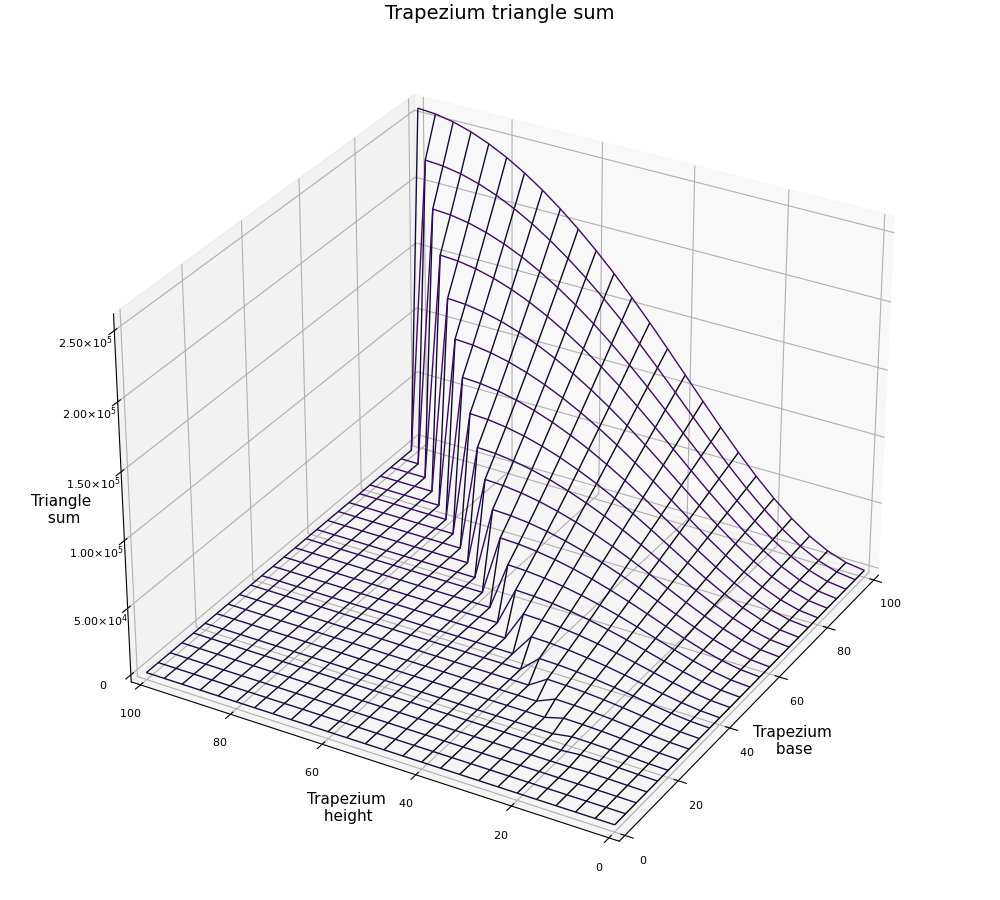

In [20]:
pyplot()
bases=(0:4:100)
heights=(0:4:100)
plt2 =Plots.plot(bases,heights,total_triangle_sum,st=:wireframe,size=(1000,900),title = "Trapezium triangle sum",camera=(-60,30), xlabel= "Trapezium\n base", ylabel= "Trapezium\n height", zlabel= "Triangle\n sum")

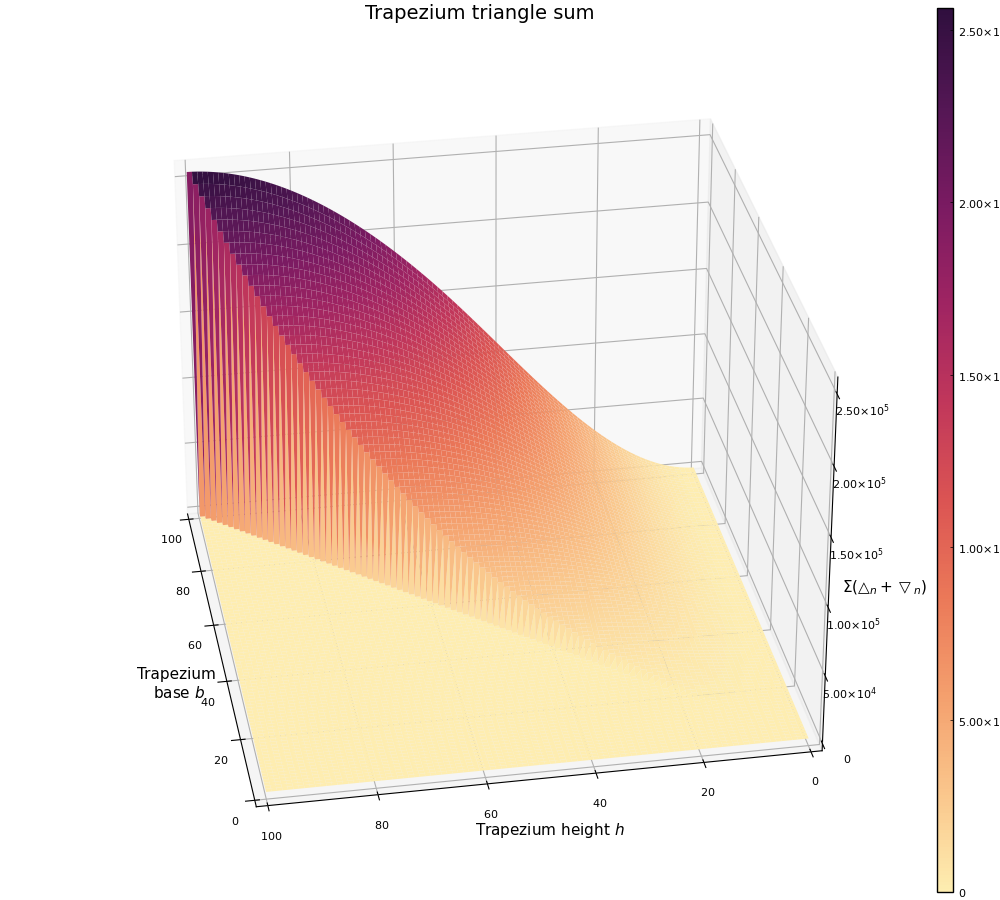

In [21]:
pyplot()
bases=(0:1:100)
heights=(0:1:100)
plt3=Plots.plot(bases,heights,total_triangle_sum,st=:surface,camera=(-100,30),size=(1000,900), c=cgrad(:matter, 10, categorical = false, scale = :log2),title = "Trapezium triangle sum", xlabel= "Trapezium \nbase"*L"\ b", ylabel= "Trapezium height"*L"\ h", zlabel= L"\Sigma (\bigtriangleup_n+\bigtriangledown_n)")

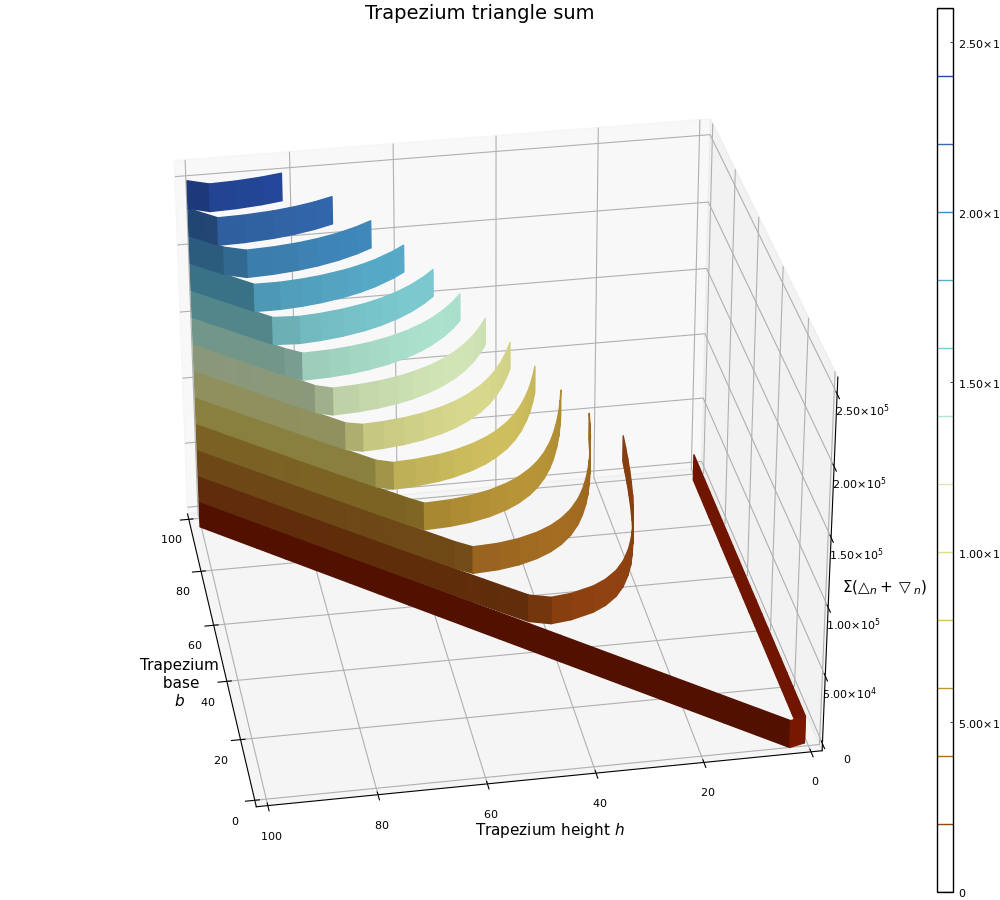

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [22]:
pyplot()
bases=(0:1:100)
heights=(0:1:100)
Plots.plot(bases,heights,total_triangle_sum,st=:contour3d,camera=(-100,30),size=(1000,900),c=cgrad(:roma, 10, categorical = false, scale = :log2),title = "Trapezium triangle sum", xlabel= "Trapezium\n base\n"*L"b", ylabel= "Trapezium height"*L"\ h", zlabel= L"\Sigma (\bigtriangleup_n+\bigtriangledown_n)")

In [23]:
plotly()
plt2= Plots.plot3d(x,y,z,
     seriestype=:scatter, markersize = 2, size=(1000,1000),title = "Trapezium triangle Sum", xlabel= "Trapezium base", ylabel= "Trapezium height", zlabel= "Triangle sum", legend = false)
display(plt2)

In [ ]:
pyplot()
df=80
anim = @animate for i = 1:df:length(x)
    Plots.scatter(x[1:1:i], y[1:1:i], z[1:1:i], markersize = 4, camera = (-50, 30), xlim = (0, x[end]),
        ylim = (0, y[end]), zlim = (0, z[end]), size=(1000,800), 
        xlabel="Trapezium \n base "*L"b", ylabel="Trapezium \n height "*L"h", zlabel="\nTriangle \n sum", 
        title = "Trapezium triangle sum", legend = false, c=:red)
end
 
gif(anim, "trapeziumplot_fps10.gif", fps = 10)

# If the plot output fails then execute ffmpeg directly in a terminal by 
# copying the appropriate line from the error message output
# Including the line below pauses the gif file at the end of the animation for a few moments.
# -final_delay 400

In [ ]:
x,y,z = make_base_height_sum_arrays(1,100,1,100);
pyplot()
@gif for j=1:length(x)
    Plots.scatter(x[1:j],y[1:j],z[1:j],ylim = (0, y[end]),
        xlim =(0,x[end]), zlim = (0, z[end]), size=(1200,1000),
    title = "Trapezium triangle sum", xlabel= "Trapezium \n base "*L"b", ylabel= "Trapezium\n height "*L"h", 
    zlabel= "\n"*L"\Sigma (\bigtriangleup_n+\bigtriangledown_n)", legend = false, color=:blue,
    camera = (-30, 40),
    marker = 0.6)
end every 100